# SETUP

In [22]:
import cv2
import numpy as np
import os
from IPython.display import display, Image

In [23]:
# Kích thước kernel dùng cho các phép lọc
kernel_size = 5

# Thư mục chứa ảnh
image_folder = "images"

# Lấy danh sách các file ảnh trong folder
image_files = [
    f for f in os.listdir(image_folder)
    if f.lower().endswith(('.jpg', '.png', '.jpeg'))
]

print(f"Found {len(image_files)} images:")
print(image_files)

Found 2 images:
['IMG.jpg', 'leto.jpg']


# Load ảnh màu


Processing image: IMG.jpg


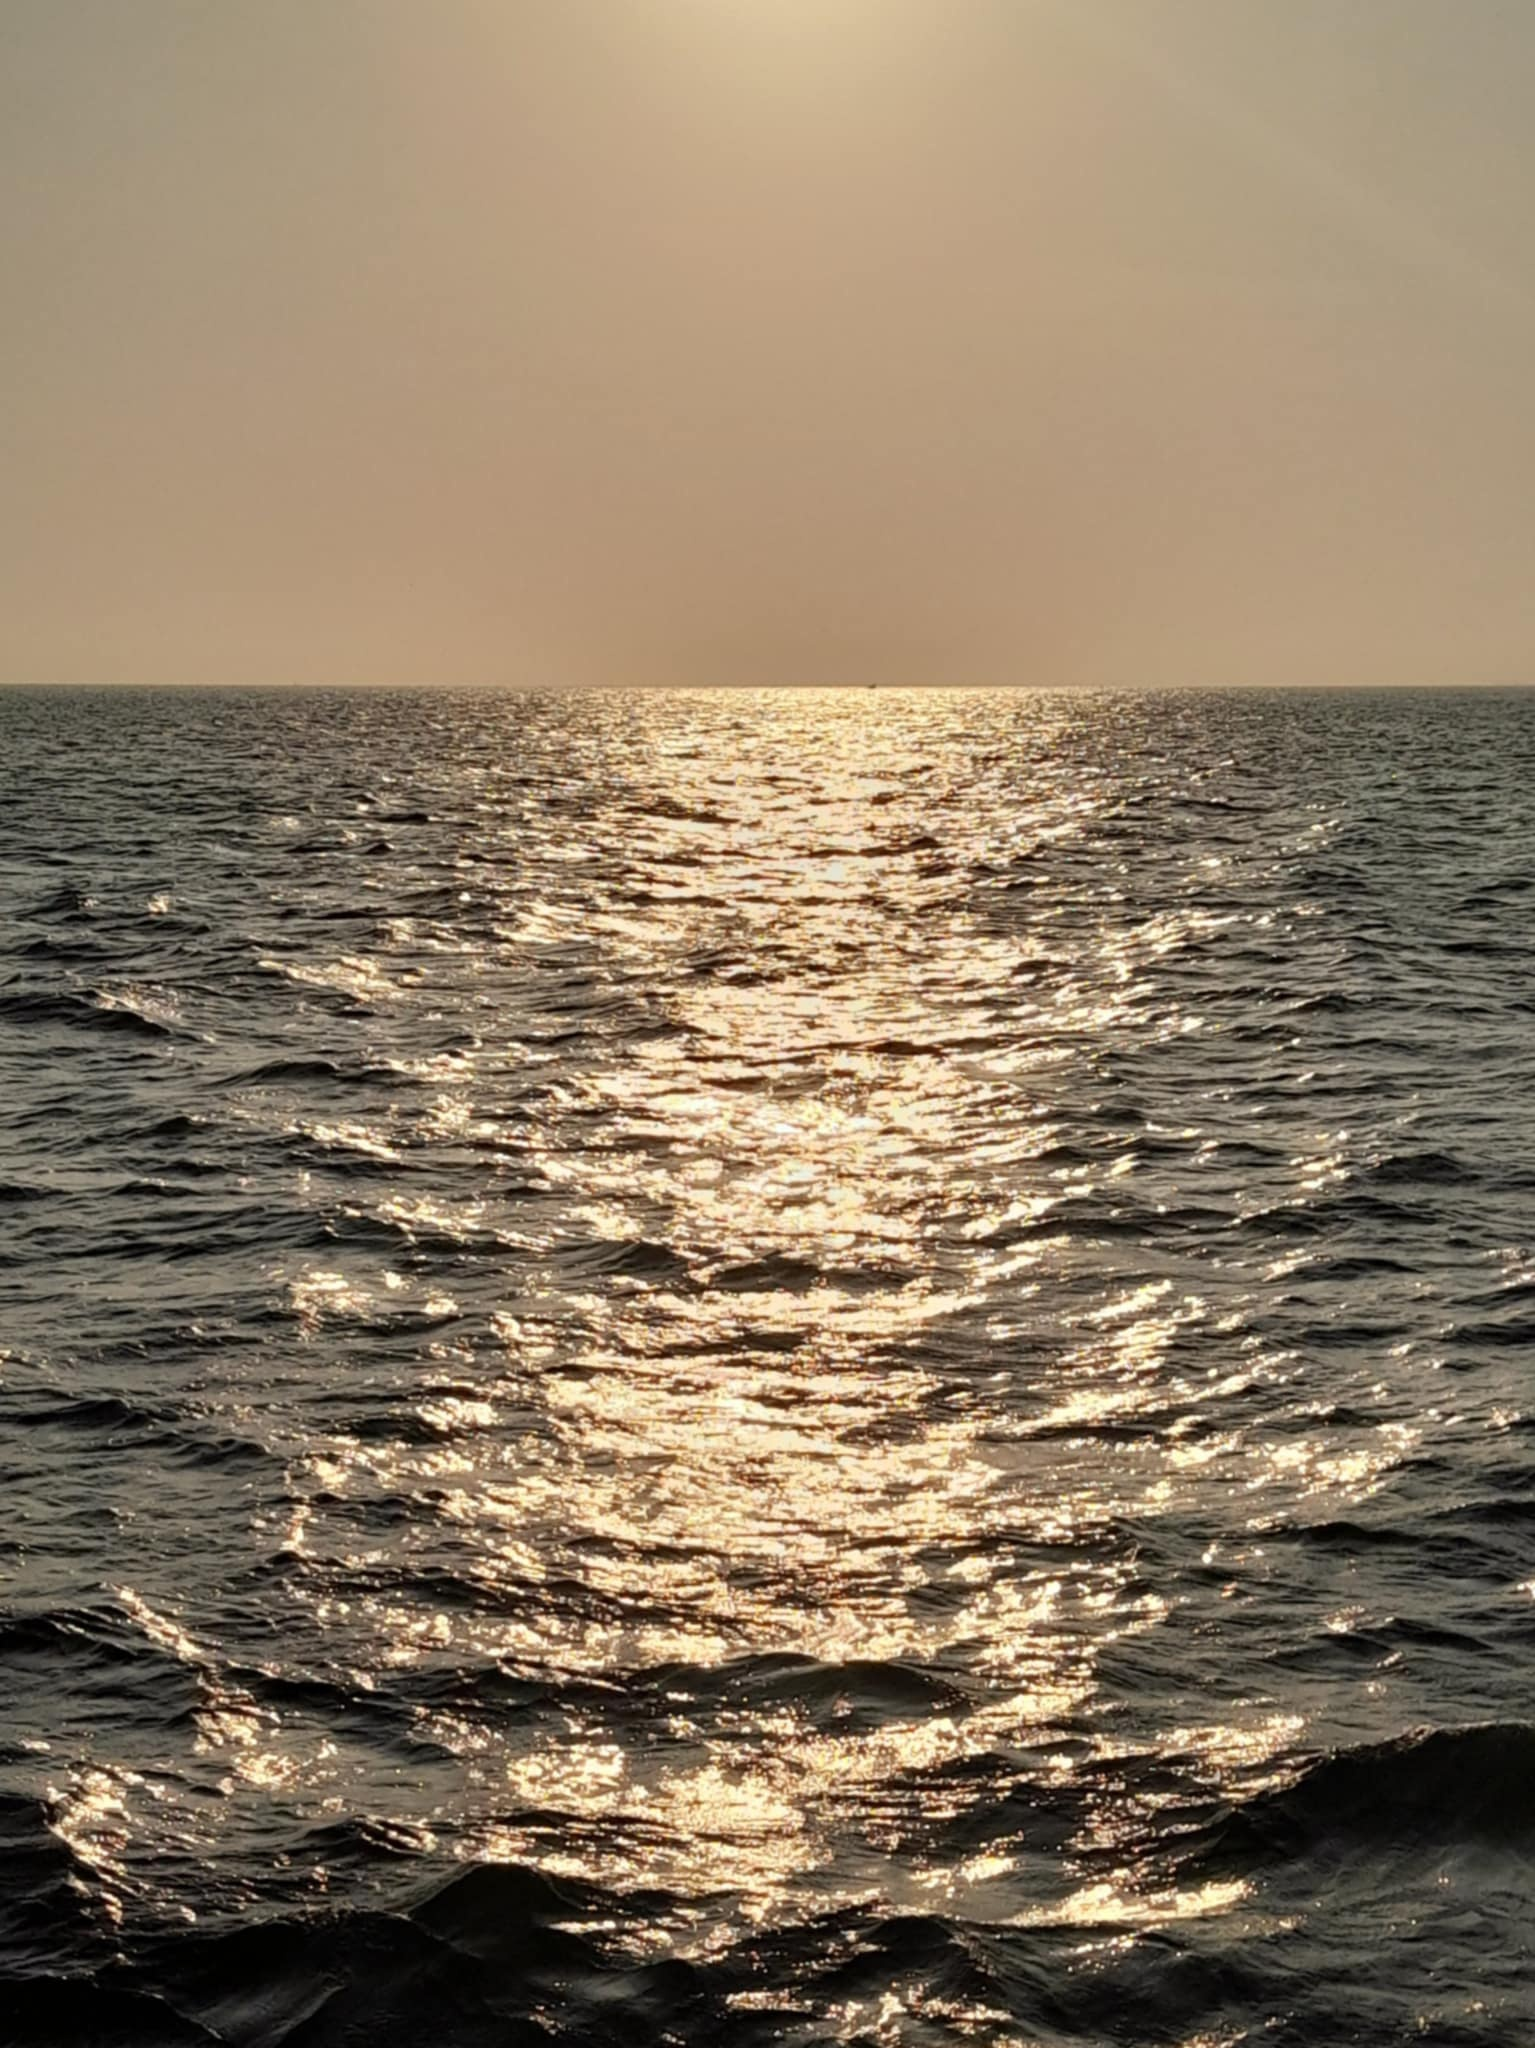


Processing image: leto.jpg


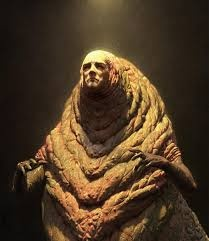

In [24]:
for file in image_files:
    print(f"\nProcessing image: {file}")
    
    # Load ảnh màu
    img = cv2.imread(os.path.join(image_folder, file))
    
    # Hiển thị ảnh gốc
    display(Image(cv2.imencode('.jpg', img)[1].tobytes(), width=200))

# PHẦN 2 – LỌC ẢNH (LOW-PASS & HIGH-PASS)

## Low-pass filter (Làm trơn – giảm nhiễu)

### Median
Median thay thế pixel bằng trung vị lân cận, hiệu quả với nhiễu dạng muối tiêu.

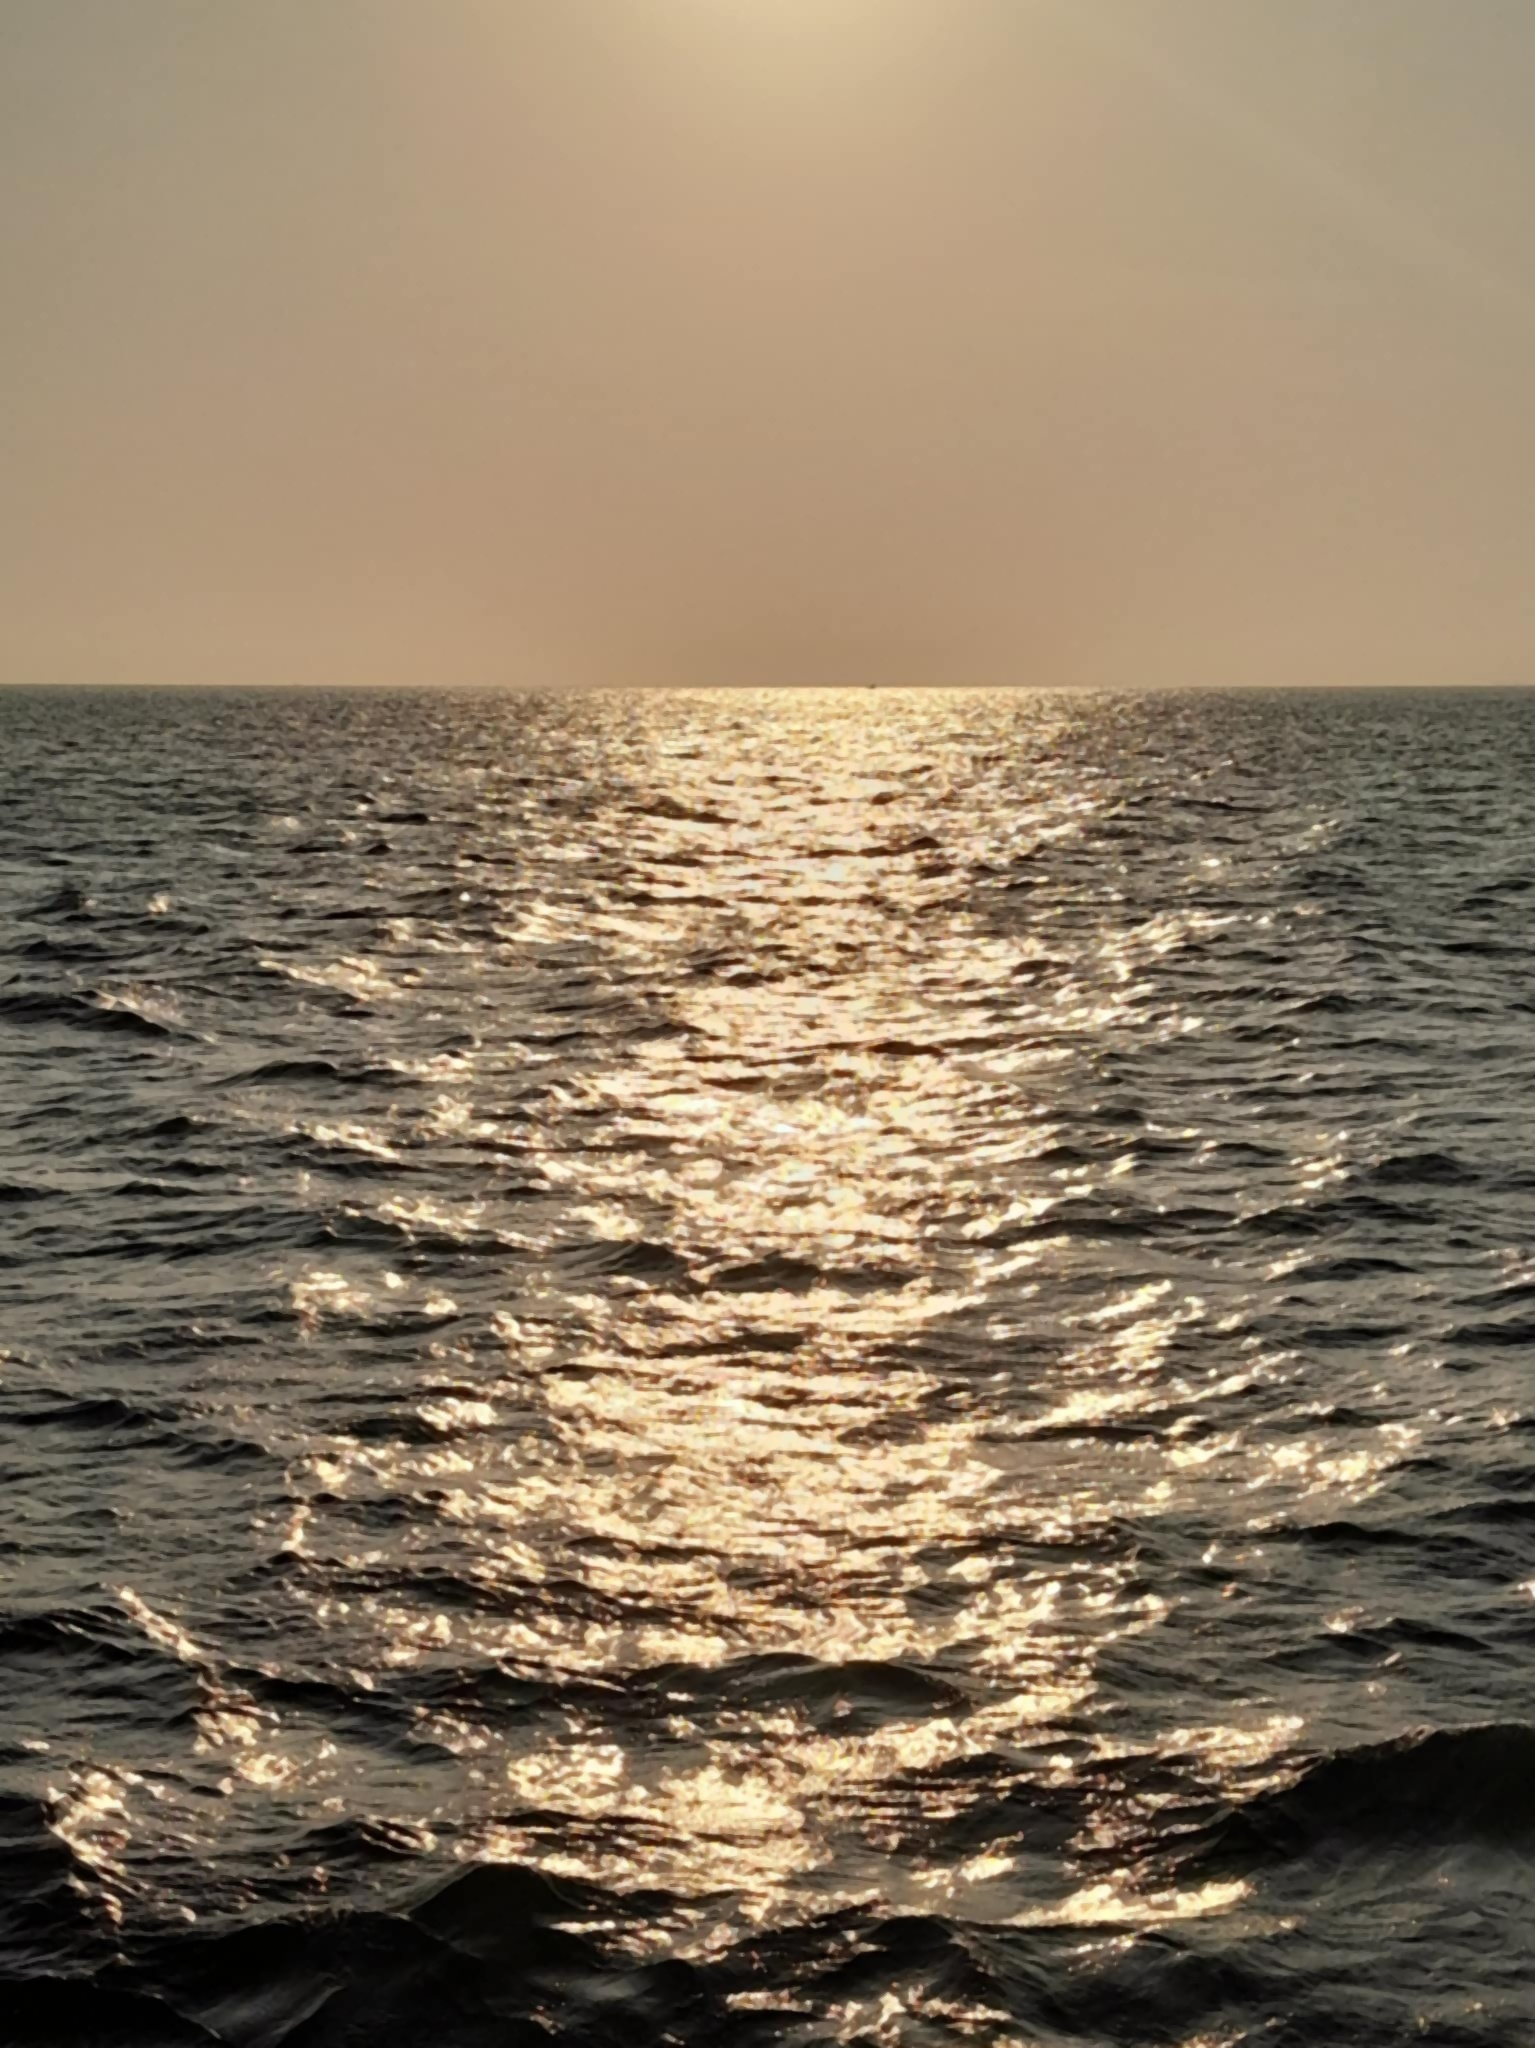

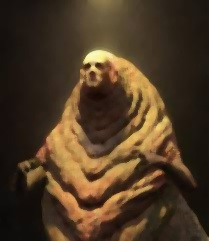

In [25]:
for file in image_files:
    img = cv2.imread(os.path.join(image_folder, file))
    # Median filter với cửa sổ 5x5
    median = cv2.medianBlur(img, kernel_size)
    display(Image(cv2.imencode('.jpg', median)[1].tobytes(), width=200))

### Gaussian
Gaussian filter sử dụng trọng số theo khoảng cách, làm trơn ảnh mượt hơn và ít làm mờ biên hơn mean filter.

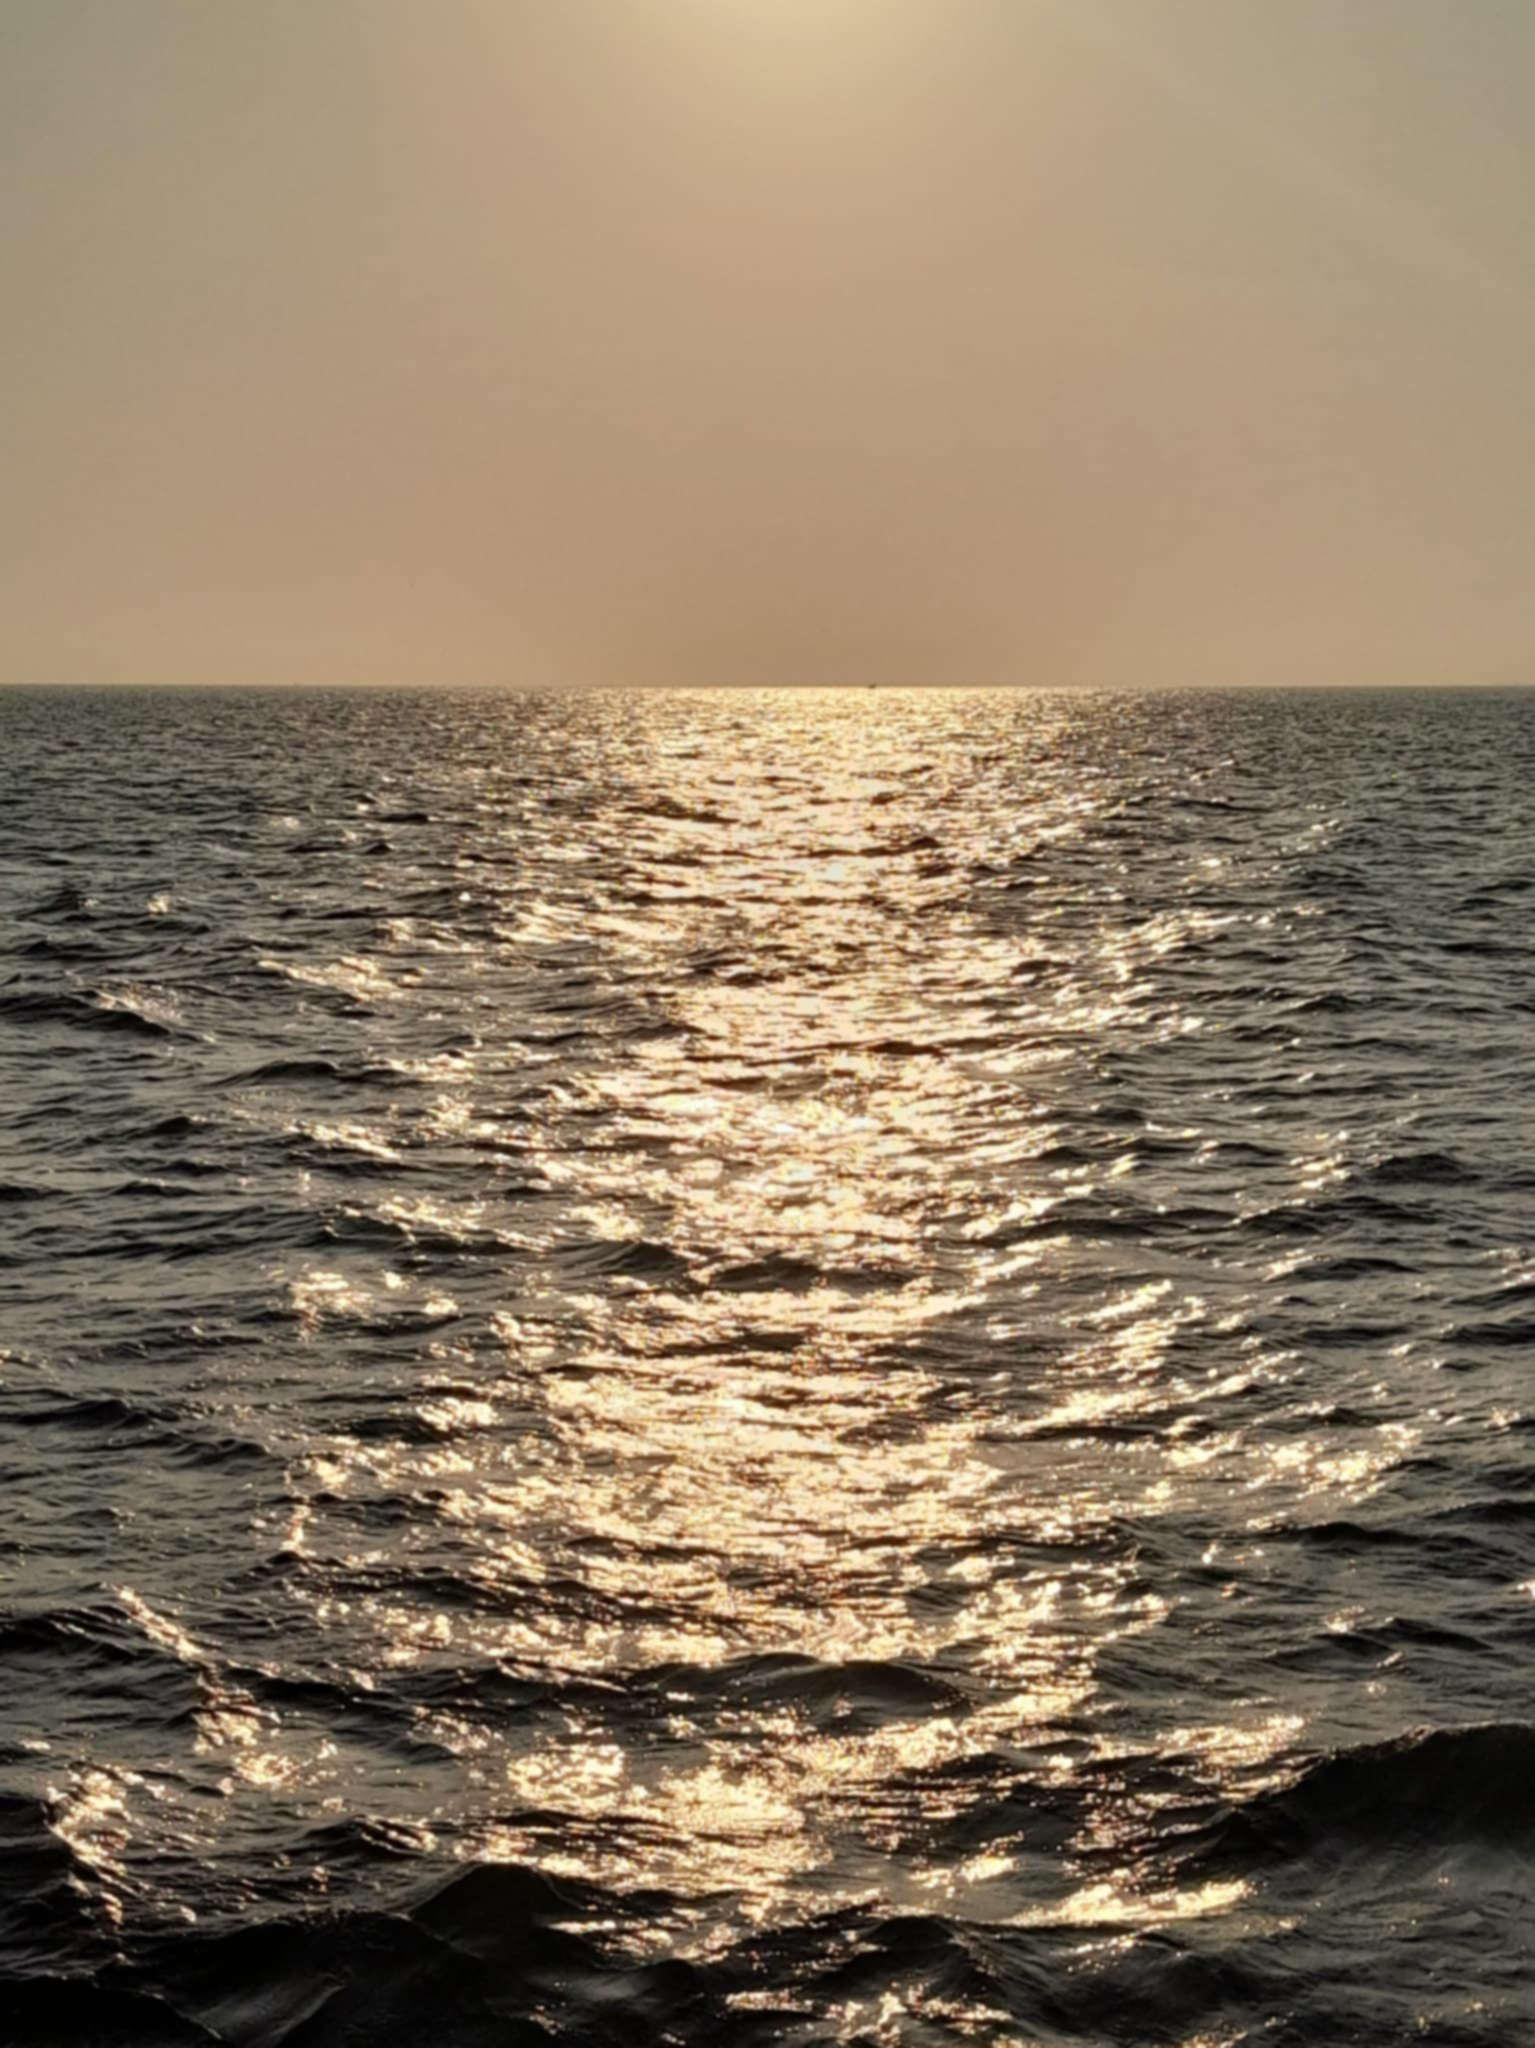

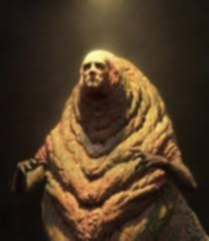

In [26]:
for file in image_files:
    img = cv2.imread(os.path.join(image_folder, file))
    # Tạo kernel Gaussian 1D
    kernel_1D = cv2.getGaussianKernel(kernel_size, 0)
    # Tạo kernel Gaussian 2D
    kernel = np.outer(kernel_1D, kernel_1D)
    # Áp dụng Gaussian blur
    img_lpf = cv2.filter2D(img, -1, kernel)
    display(Image(cv2.imencode('.jpg', img_lpf)[1].tobytes(), width=200))

## High-pass filter (Làm nổi biên & chi tiết)

### Sobel
Sobel phát hiện biên ảnh theo phương ngang và dọc dựa trên đạo hàm bậc nhất.

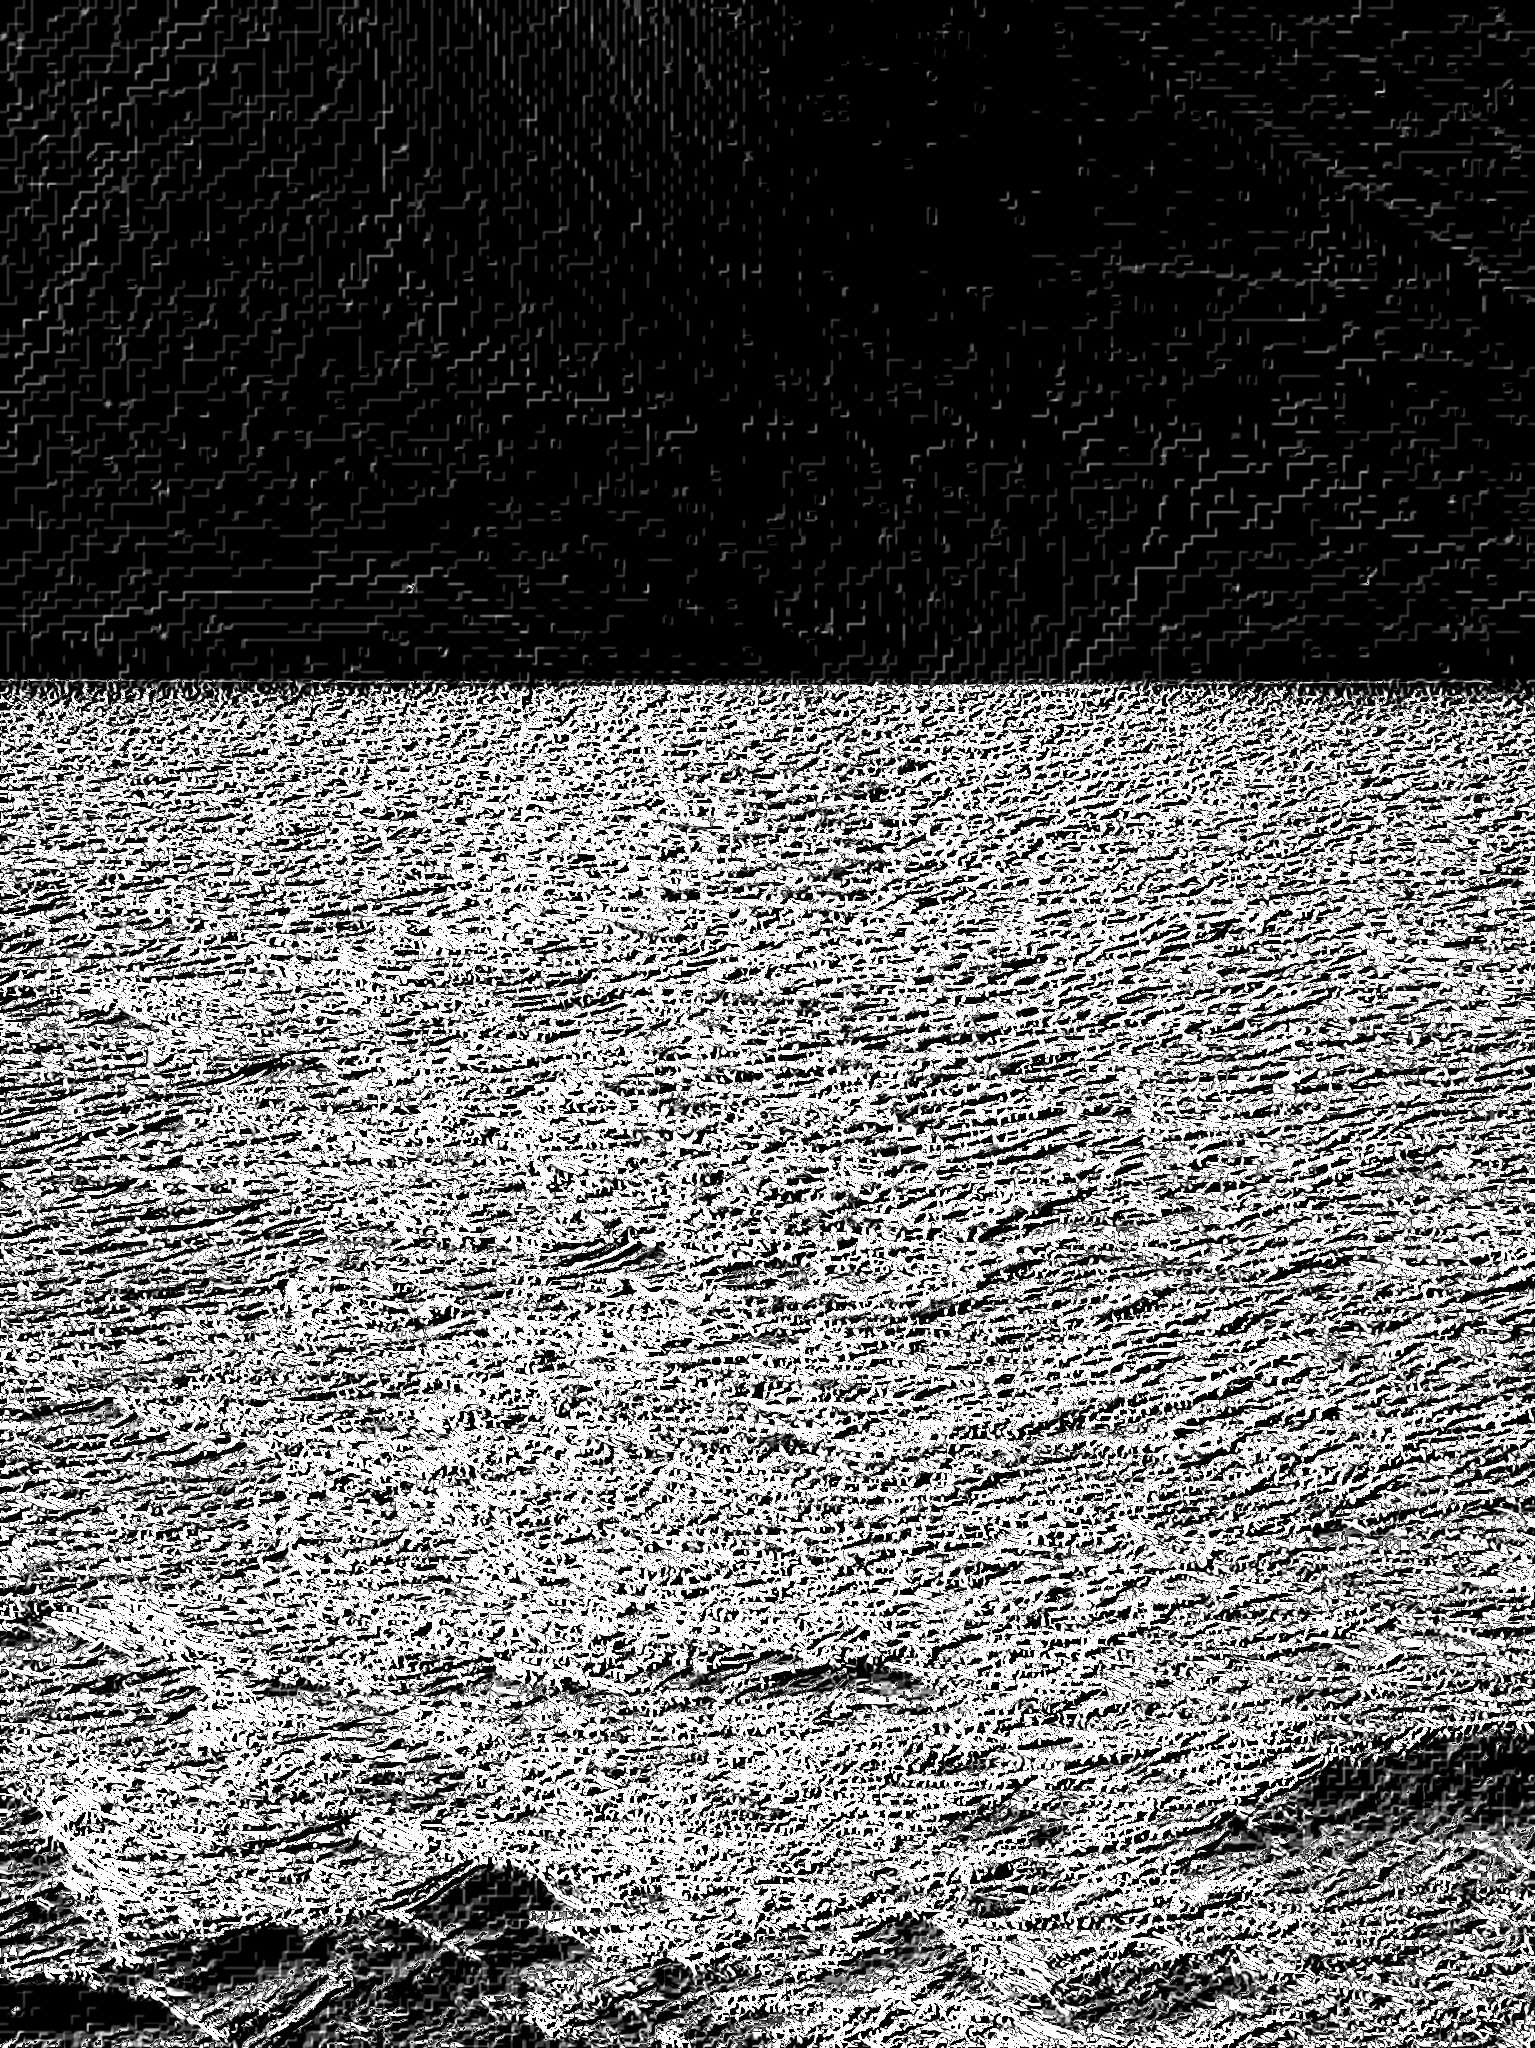

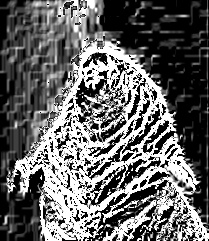

In [27]:
for file in image_files:
    img = cv2.imread(os.path.join(image_folder, file))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Sobel theo hướng X và Y
    sobelx = cv2.Sobel(gray, -1, 1, 0, ksize=kernel_size)
    sobely = cv2.Sobel(gray, -1, 0, 1, ksize=kernel_size)
    
    # Kết hợp biên theo hai hướng
    img_hpf = cv2.convertScaleAbs(sobelx) + cv2.convertScaleAbs(sobely)
    display(Image(cv2.imencode('.jpg', img_hpf)[1].tobytes(), width=200))

### Laplacian
Laplacian làm nổi biên không phụ thuộc hướng, nhưng nhạy với nhiễu.

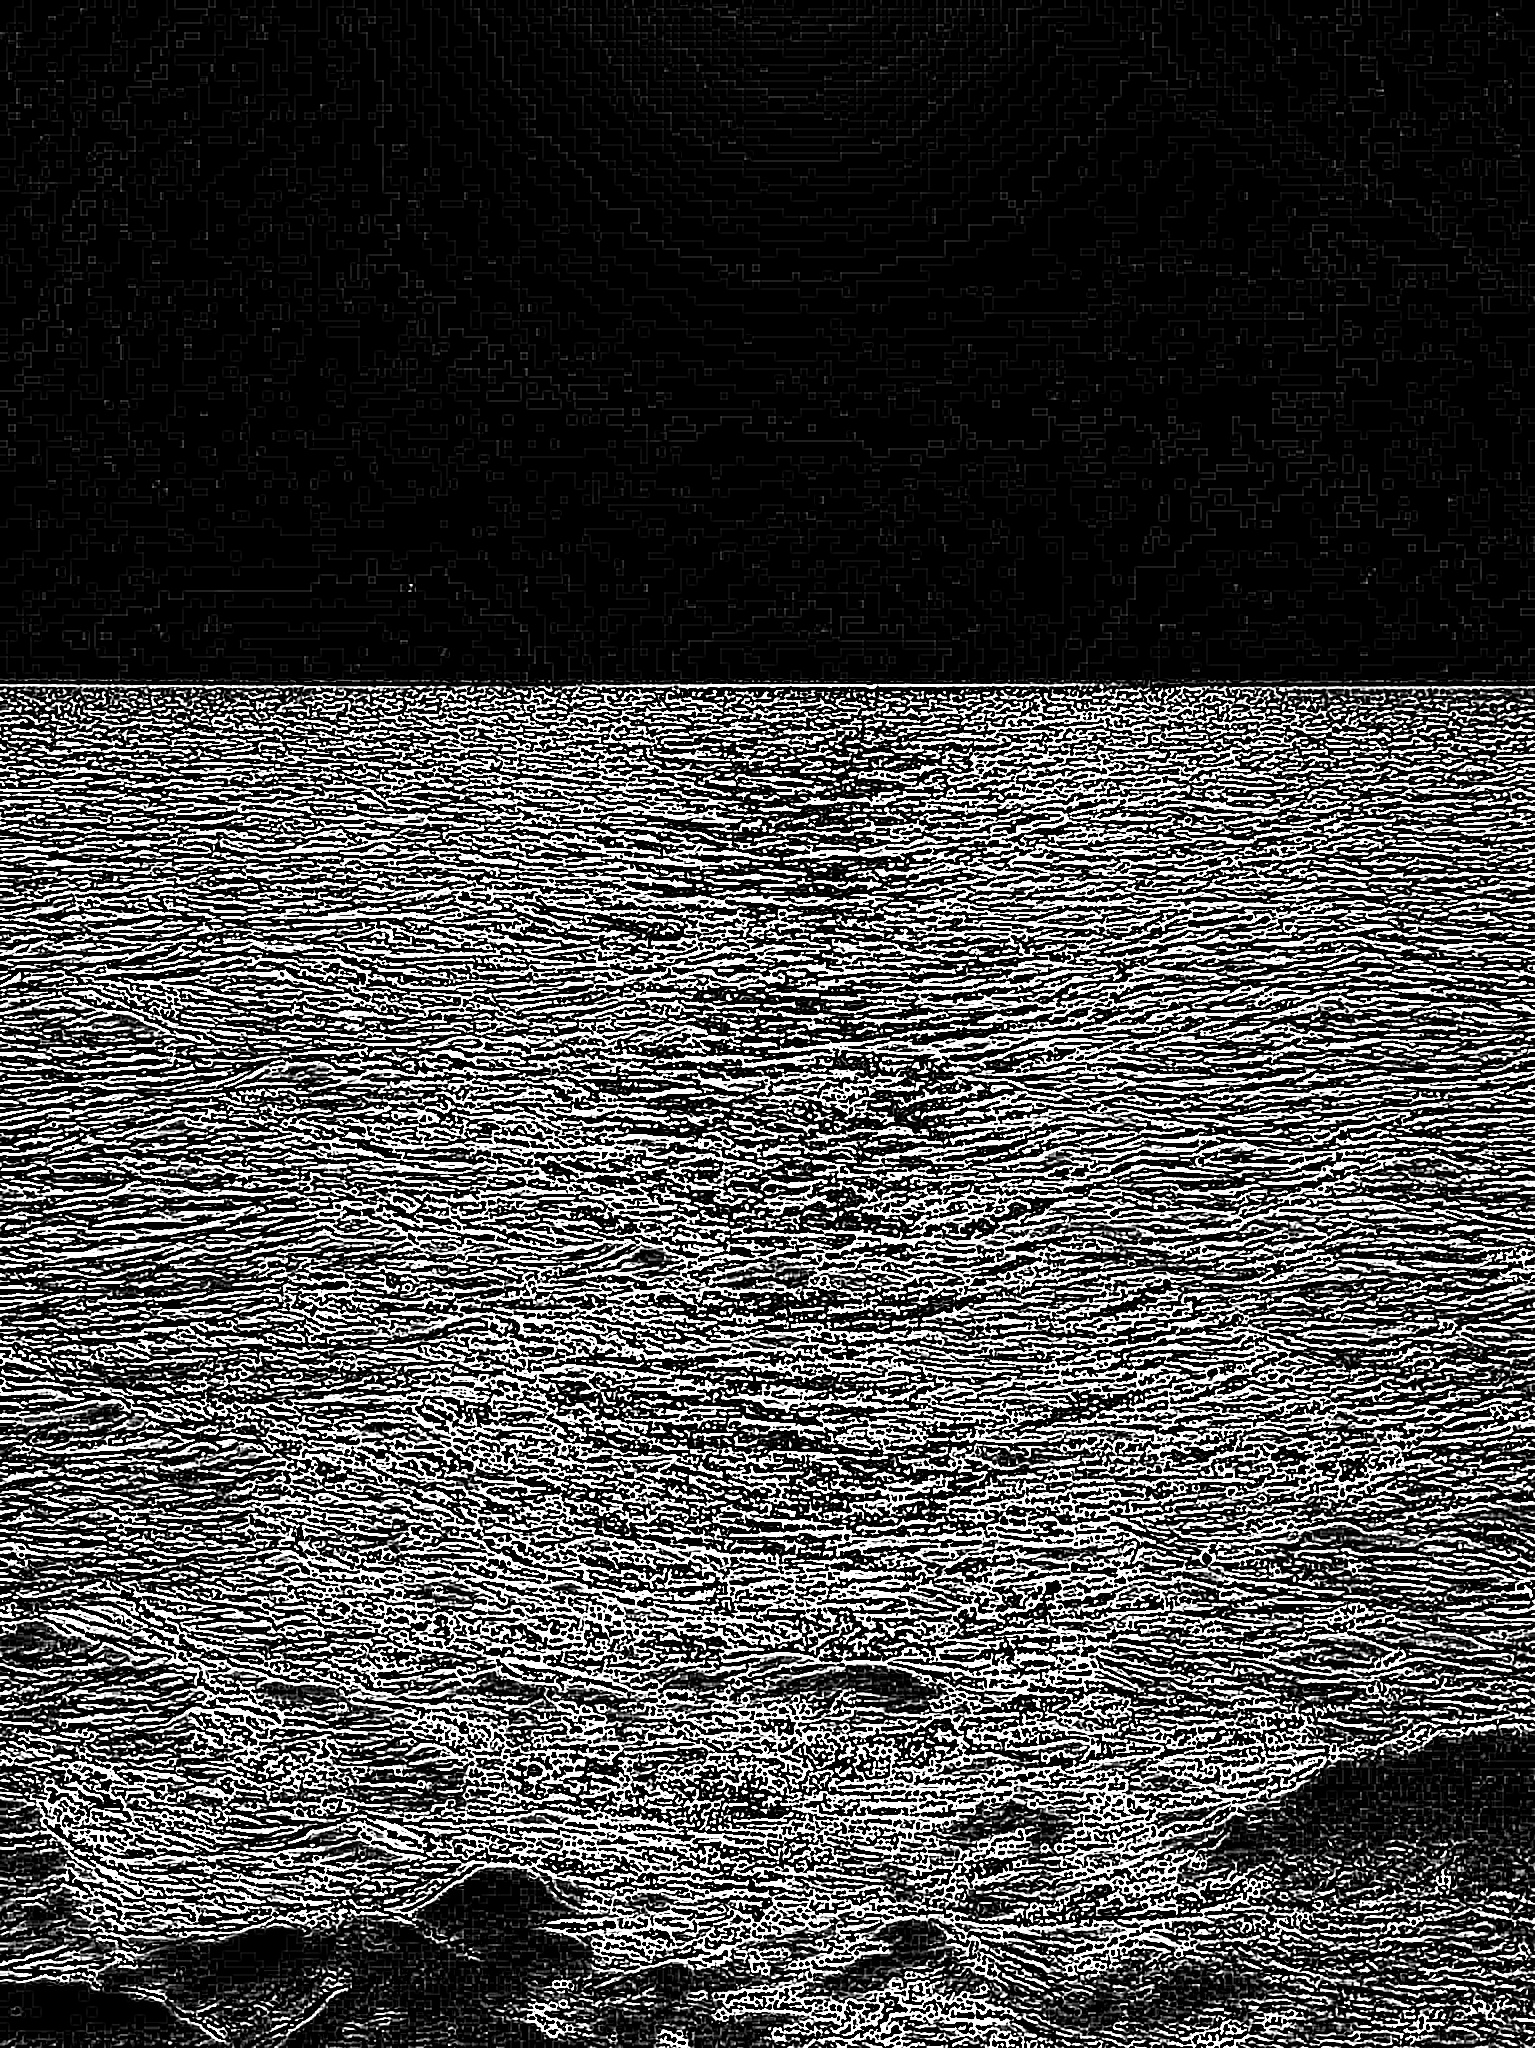

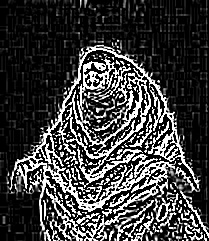

In [28]:
for file in image_files:
    img = cv2.imread(os.path.join(image_folder, file))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_hpf = cv2.Laplacian(gray, -1, ksize=kernel_size)
    display(Image(cv2.imencode('.jpg', img_hpf)[1].tobytes(), width=200))